In [ ]:
## https://imasters.com.br/back-end/como-fazer-web-scraping-com-python
## conda install beautifulsoup4

## https://github.com/amueller/word_cloud
## conda install -c conda-forge wordcloud

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
html = urlopen("http://cio.com.br/opiniao/2018/07/05/a-inteligencia-artificial-esta-perto-do-seu-ponto-de-inflexao/")
res = BeautifulSoup(html.read(),"html5lib")
tags = res.findAll("div", {"class": "texto"})
texto = ""
for tag in tags:
    #print(tag.getText())
    texto += tag.getText()
#print(texto)

In [3]:
stopwords = nltk.corpus.stopwords.words('portuguese')
#stopwords

In [4]:
#http://minerandodados.com.br/index.php/2017/06/22/mineracao-de-textos-7-tecnicas/
def RemoverStopWords(texto):
    texto = texto.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in texto.split() if not i in stopwords]
    return (" ".join(palavras))

In [5]:
texto2 = RemoverStopWords(texto)
#texto2

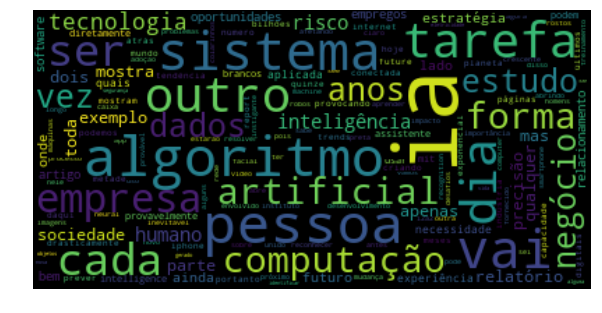

In [6]:
wc = WordCloud(collocations=False)
wc.generate(texto2)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()